In [3]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [4]:
#Load the dataset
ds = pd.read_csv('/home/lab/Desktop/Assign/mediCost/insurance.csv')

In [5]:
#Display first 5 rows of the dataset
ds.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Display the last 5 rows of the dataset
ds.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [75]:
#Getting total number of rows and number of columns
ds.shape

(1338, 7)

In [72]:
#Description about data columns
ds.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [73]:
#Column information (Number of instances, Null/NotNull, Datatype)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


In [12]:
#Grouping insurance beneficiaries based on their place of residency
region = ds.groupby(by = 'region').size()
print(region)

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


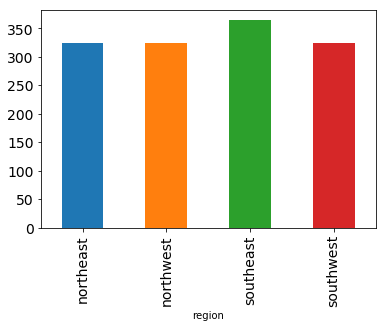

In [9]:
#plot in a bar chart
plt.xlabel("region")
region.plot(kind = 'bar',fontsize=14)

In [10]:
#Group insurance beneficiaries by the attribute smoking tobacco
smoker = ds.groupby(by = 'smoker').size()
print(smoker)

smoker
no     1064
yes     274
dtype: int64


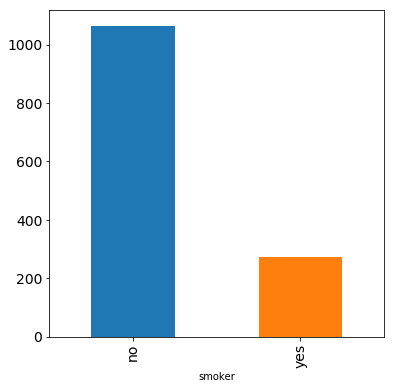

In [11]:
#Plot the number of smokers and non-smokers in a bar chart.
plt.figure(figsize=(6,6))
smoker.plot(kind = 'bar',fontsize=14)

In [10]:
#Group people by gender
sex = ds.groupby(by = 'sex').size()
print(sex)

sex
female    662
male      676
dtype: int64


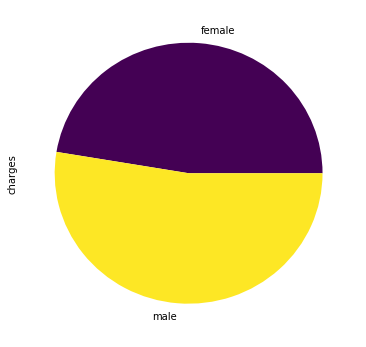

In [18]:
#Pie chart to visulaize which gender owns a higher medical cost.
plt.figure(figsize=(6,6))
ds.groupby(by = "sex")["charges"].mean().plot(kind = 'pie',colormap='viridis')

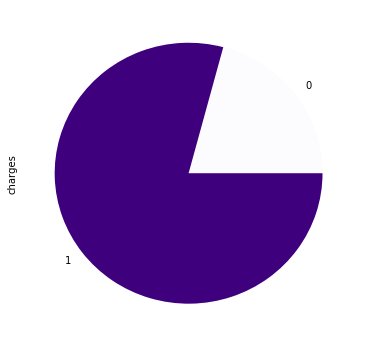

In [74]:
#Pie chart to visualize who owns highr medical costs (Smokers / Non-smokers)
plt.figure(figsize=(6,6))
ds.groupby(by = "smoker")["charges"].mean().plot(kind = 'pie',colormap='Purples')

In [19]:
#Code for Regression Analysis.
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation


ds['smoker'] = pd.get_dummies(ds['smoker'])
ds['region'] = pd.get_dummies(ds['region'])
ds['sex'] = pd.get_dummies(ds['sex'])


X = ds.drop('charges', axis=1)
Y = ds['charges']
X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(X,Y,test_size=0.2)

re = LinearRegression()
f = re.fit(X_train, Y_train)

/home/lab/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
Y_pred = re.predict(X_test)

In [22]:
Y_pred

array([30164.19691581,  9288.81793084, 13059.94612411, 11262.80734407,
        -424.1277466 , 13264.72079285,  6323.57863415, 15816.81845046,
       37982.07673783,  1753.60935379, 36461.28177222,  5457.77301437,
        3412.78633917,  8744.61612189, 33320.30638721, 33292.21748719,
        6591.99166784,  8598.82055489, 36281.95900327,  5441.84260782,
       33666.68873658,   722.76020507, 35872.91021099, 30333.01574768,
        1241.93431973, 12413.31161745,  5809.99871609,  6981.64940004,
       11582.90988193, 35199.84658319, 15732.40675367,  4405.17787418,
       31002.13829589, 10867.70398732,  2563.35390259, 10748.27399829,
         812.16846804,  5776.67402801,  1503.86448517, 16159.52354618,
        7760.2531162 ,  5131.15160862,  9617.97980373, 13130.61071767,
        8730.69396889,  2695.76842315,  6282.05794105, 10534.57179225,
        9837.64127677, 13444.69551418,  8655.65765488,  6714.70799823,
        9716.21516996,  4047.10742176,  1327.0550767 , 14699.95148726,
      

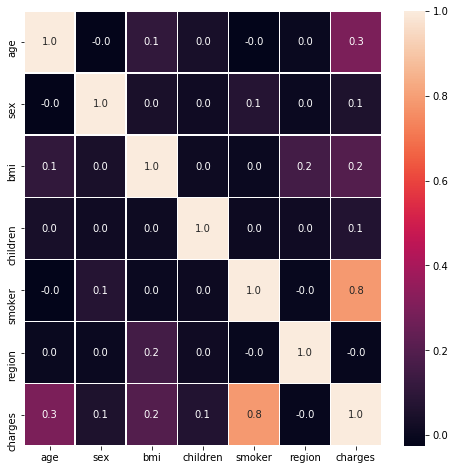

In [68]:
#Convert non-numerical variales to numerical variables and generate heatmap to evaluate the correlation
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(list(ds['sex'].values)) 
ds['sex'] = lbl.transform(list(ds['sex'].values))

lbl.fit(list(ds['smoker'].values)) 
ds['smoker'] = lbl.transform(list(ds['smoker'].values))

lbl.fit(list(ds['region'].values)) 
ds['region'] = lbl.transform(list(ds['region'].values))

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(ds.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)